# Baca Data Masukkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import torch

In [ ]:
import pandas as pd

mssqldf = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_MSSQL.csv', sep=',')
ssdpdf = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_SSDP.csv', sep=',')

mergedf = pd.concat([mssqldf, ssdpdf], ignore_index=True)
mergedf.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', index = None, header=True)

del mssqldf, ssdpdf, mergedf

In [ ]:
import pandas as pd

mssqldftest = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-03-11/03-11/MSSQL.csv', sep=',')

mergedftest = pd.concat([mssqldftest], ignore_index=True)
mergedftest.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe_test.csv', index = None, header=True)

del mssqldftest, mergedftest

## Inisialisasi dataset pelatihan dan pengujian

In [2]:
train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')

C:\Users\BARA\AppData\Local\Temp\ipykernel_18168\3659915197.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')


In [ ]:
test_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe_test.csv', sep=',')

In [3]:
train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')
test_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe_test.csv', sep=',')

C:\Users\BARA\AppData\Local\Temp\ipykernel_20288\48848169.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')
C:\Users\BARA\AppData\Local\Temp\ipykernel_20288\48848169.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe_test.csv', sep=',')


In [4]:
train_df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,139,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:32:32.915441,119151083,60959,...,2.853681e+07,67834732.0,4024278.0,5975510.0,98.183502,5975622.0,5975358.0,0,1,DrDoS_MSSQL
1,38385,172.16.0.5-192.168.50.1-850-20345-17,172.16.0.5,850,192.168.50.1,20345,17,2018-12-01 11:32:32.915442,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
2,27033,172.16.0.5-192.168.50.1-851-21631-17,172.16.0.5,851,192.168.50.1,21631,17,2018-12-01 11:32:32.915578,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
3,34348,172.16.0.5-192.168.50.1-852-15332-17,172.16.0.5,852,192.168.50.1,15332,17,2018-12-01 11:32:32.915773,2,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
4,19225,172.16.0.5-192.168.50.1-853-41853-17,172.16.0.5,853,192.168.50.1,41853,17,2018-12-01 11:32:32.916114,2,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL


In [5]:
test_df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,98115,172.16.0.5-192.168.50.4-615-28754-17,172.16.0.5,615,192.168.50.4,28754,17,2018-11-03 10:29:52.072724,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
1,137,172.16.0.5-192.168.50.4-0-0-0,172.16.0.5,0,192.168.50.4,0,0,2018-11-03 10:29:52.072729,117876168,25274,...,0.0,81408014.0,81408014.0,6258062.0,0.0,6258062.0,6258062.0,0,1,LDAP
2,98988,172.16.0.5-192.168.50.4-900-42364-17,172.16.0.5,900,192.168.50.4,42364,17,2018-11-03 10:29:52.072825,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
3,35177,172.16.0.5-192.168.50.4-616-10537-17,172.16.0.5,616,192.168.50.4,10537,17,2018-11-03 10:29:52.073221,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
4,55362,172.16.0.5-192.168.50.4-617-14928-17,172.16.0.5,617,192.168.50.4,14928,17,2018-11-03 10:29:52.073285,44,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP


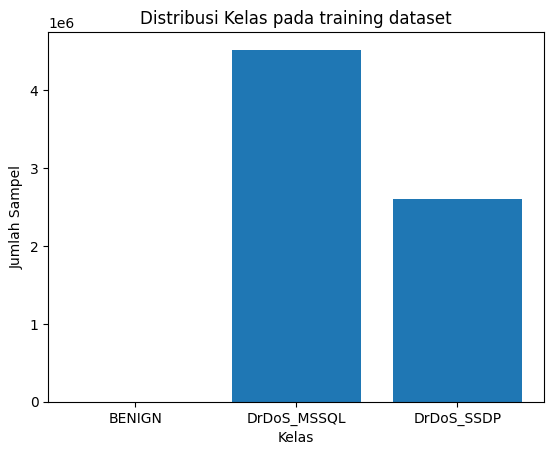

In [6]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels, counts = np.unique(train_df[' Label'], return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas pada training dataset')
plt.show()

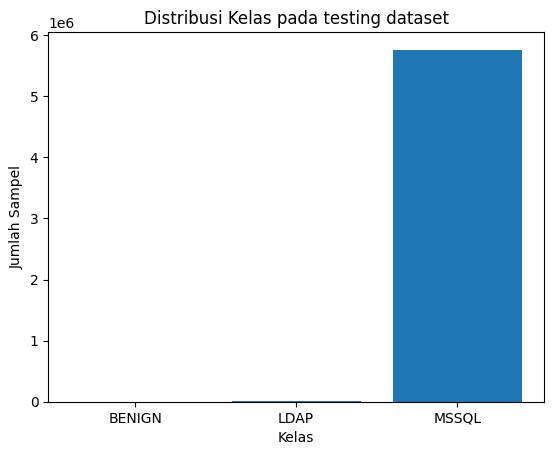

In [6]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels, counts = np.unique(test_df[' Label'], return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas pada testing dataset')
plt.show()

In [7]:
# Hitung jumlah sampel untuk setiap kelas
jumlah_attack1 = len(train_df[train_df[' Label'] == 'DrDoS_MSSQL'])
jumlah_attack2 = len(train_df[train_df[' Label'] == 'DrDoS_SSDP'])
jumlah_normal = len(train_df[train_df[' Label'] == 'BENIGN'])

print(f'Jumlah sampel Attack pada training dataset: {jumlah_attack1 + jumlah_attack2}')
print(f'Jumlah sampel Normal pada training dataset: {jumlah_normal}')

Jumlah sampel Attack pada training dataset: 7133103
Jumlah sampel Normal pada training dataset: 2769


In [8]:
# Hitung jumlah sampel untuk setiap kelas
jumlah_attack1 = len(test_df[test_df[' Label'] == 'MSSQL'])
jumlah_attack2 = len(test_df[test_df[' Label'] == 'LDAP'])
jumlah_normal = len(test_df[test_df[' Label'] == 'BENIGN'])

print(f'Jumlah sampel Attack pada testing dataset: {jumlah_attack1 + jumlah_attack2}')
print(f'Jumlah sampel Normal pada testing dataset: {jumlah_normal}')

Jumlah sampel Attack pada testing dataset: 5772992
Jumlah sampel Normal pada testing dataset: 2794


# Preprocessing data

Mengecek nilai infinity

In [3]:
# Mengecek keberadaan nilai Infinity dalam seluruh dataset
cek_infinity = train_df.isin([np.inf, -np.inf])

# Jumlah nilai Infinity dalam setiap kolom
jumlah_infinity_per_kolom = cek_infinity.sum()

# Menyaring fitur yang memiliki nilai Infinity
fitur_dengan_infinity = jumlah_infinity_per_kolom[jumlah_infinity_per_kolom > 0]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Menampilkan hasil
print("Fitur dengan Jumlah Infinity per Kolom:")
print(fitur_dengan_infinity)

Fitur dengan Jumlah Infinity per Kolom:
Flow Bytes/s       168500
 Flow Packets/s    168516
dtype: int64


mengubah nilai infinity dengan 0

In [5]:
train_df = train_df.replace('Infinity','0')
train_df = train_df.replace(np.inf,0)

cek_infinity = train_df.isin([np.inf, -np.inf])

# Jumlah nilai Infinity dalam setiap kolom
jumlah_infinity_per_kolom = cek_infinity.sum()
fitur_dengan_infinity = jumlah_infinity_per_kolom[jumlah_infinity_per_kolom > 0]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Menampilkan hasil
print("Jumlah Infinity per Kolom:")
print(fitur_dengan_infinity)

Jumlah Infinity per Kolom:
Series([], dtype: int64)


In [ ]:
train_df.info()

Mengecek data yang kosong 

In [4]:
# Mengecek nilai-nilai yang hilang dalam setiap kolom
nilai_hilang_per_kolom = train_df.isnull().sum()
fitur_dengan_missing = nilai_hilang_per_kolom[nilai_hilang_per_kolom > 0]

# Menampilkan hasil
print("Jumlah Nilai Hilang per Kolom:")
print(fitur_dengan_missing)

Jumlah Nilai Hilang per Kolom:
Flow Bytes/s    16
dtype: int64


karena data yang 'nan' hanya sedikit bisa kita isi dengan rata-rata nilai pada tabel yang berisi data 'nan' 

In [6]:
train_df['Flow Bytes/s'] = train_df['Flow Bytes/s'].fillna(train_df['Flow Bytes/s'].mean())

Mengecek apakah data yang 'nan' telah terisi.

In [8]:
# Mengecek nilai-nilai yang hilang dalam setiap kolom
nilai_hilang_per_kolom = train_df.isnull().sum()
fitur_dengan_missing = nilai_hilang_per_kolom[nilai_hilang_per_kolom > 0]

# Menampilkan hasil
print("Jumlah Nilai Hilang per Kolom:")
print(fitur_dengan_missing)

Jumlah Nilai Hilang per Kolom:
Series([], dtype: int64)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7135872 entries, 0 to 7135871
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

Mengubah ' Label' menjadi 0 untuk aliran normal dan 1 untuk aliran serangan guna memudahkan model untuk melakukan biner klasifikasi.

In [10]:
#Label
train_df[' Label'] = train_df[' Label'].replace('BENIGN',0)
train_df[' Label'] = train_df[' Label'].replace('DrDoS_MSSQL',1)
train_df[' Label'] = train_df[' Label'].replace('DrDoS_SSDP',1)

In [11]:
train_df[' Label'].unique()

array([1, 0], dtype=int64)

In [ ]:
train_df[' Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7135872 entries, 0 to 7135871
Series name:  Timestamp
Non-Null Count    Dtype 
--------------    ----- 
7135872 non-null  object
dtypes: object(1)
memory usage: 54.4+ MB


Mengubah fitur Timestamp agar dapat lebih mudah dikelola dengan machine learning dengan menjadikannya nilai hash

In [13]:
#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
# Mengonversi kolom 'Timestamp' menjadi format datetime
train_df[' Timestamp'] = pd.to_datetime(train_df[' Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
train_df['Hour'] = train_df[' Timestamp'].dt.hour
train_df['Minute'] = train_df[' Timestamp'].dt.minute
train_df['Second'] = train_df[' Timestamp'].dt.second
train_df['Time'] = train_df['Hour'].astype(str) + ':' + train_df['Minute'].astype(str) + ':' + train_df['Second'].astype(str)

import hashlib

def string2numeric_hash(text):
    text_encoded = text.encode('utf-8')
    return int(hashlib.md5(text_encoded).hexdigest()[:8], 16)

train_df[' Timestamp'] = train_df['Time'].apply(string2numeric_hash)
train_df = train_df.drop(['Time', 'Hour', 'Minute', 'Second'], axis=1)

In [14]:
train_df[' Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7135872 entries, 0 to 7135871
Series name:  Timestamp
Non-Null Count    Dtype
--------------    -----
7135872 non-null  int64
dtypes: int64(1)
memory usage: 54.4 MB


Total fitur sebelum penghapusan fitur

In [15]:
train_df.shape[1]

88

Penghapusan fitur

In [16]:
# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del train_df[' Source IP']
del train_df[' Destination IP']
del train_df['Flow ID']
del train_df['SimillarHTTP']
del train_df['Unnamed: 0']

Total fitur sesudah penghapusan fitur

In [17]:
train_df.shape[1]

83

In [9]:
train_df = train_df.replace('Infinity','0')
train_df = train_df.replace('nan','0')
train_df = train_df.fillna(0)
train_df = train_df.replace(np.inf,0)

#Label
train_df[' Label'] = train_df[' Label'].replace('BENIGN',0)
train_df[' Label'] = train_df[' Label'].replace('DrDoS_MSSQL',1)
train_df[' Label'] = train_df[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
# Mengonversi kolom 'Timestamp' menjadi format datetime
train_df[' Timestamp'] = pd.to_datetime(train_df[' Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
train_df['Hour'] = train_df[' Timestamp'].dt.hour
train_df['Minute'] = train_df[' Timestamp'].dt.minute
train_df['Second'] = train_df[' Timestamp'].dt.second
train_df['Time'] = train_df['Hour'].astype(str) + ':' + train_df['Minute'].astype(str) + ':' + train_df['Second'].astype(str)

import hashlib

def string2numeric_hash(text):
    text_encoded = text.encode('utf-8')
    return int(hashlib.md5(text_encoded).hexdigest()[:8], 16)

train_df[' Timestamp'] = train_df['Time'].apply(string2numeric_hash)
train_df = train_df.drop(['Time', 'Hour', 'Minute', 'Second'], axis=1)

# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del train_df[' Source IP']
del train_df[' Destination IP']
del train_df['Flow ID']
del train_df['SimillarHTTP']
del train_df['Unnamed: 0']

train_df.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedf_proc.csv', index = None, header=True) 
print('Labeling data processed')

Labeling data processed


In [10]:
test_df = test_df.replace('Infinity','0')
test_df = test_df.replace('nan','0')
test_df = test_df.fillna(0)
test_df = test_df.replace(np.inf,0)

#Label
test_df[' Label'] = test_df[' Label'].replace('BENIGN',0)
test_df[' Label'] = test_df[' Label'].replace('MSSQL',1)
test_df[' Label'] = test_df[' Label'].replace('LDAP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
# Mengonversi kolom 'Timestamp' menjadi format datetime
test_df[' Timestamp'] = pd.to_datetime(test_df[' Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
test_df['Hour'] = test_df[' Timestamp'].dt.hour
test_df['Minute'] = test_df[' Timestamp'].dt.minute
test_df['Second'] = test_df[' Timestamp'].dt.second
test_df['Time'] = test_df['Hour'].astype(str) + ':' + test_df['Minute'].astype(str) + ':' + test_df['Second'].astype(str)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
# Mengonversi kolom 'Timestamp' menjadi format datetime
test_df[' Timestamp'] = pd.to_datetime(test_df[' Timestamp'], errors='coerce')
test_df[' Timestamp'].fillna(np.random.choice(test_df[' Timestamp'].dropna()), inplace=True)
test_df['Hour'] = test_df[' Timestamp'].dt.hour
test_df['Minute'] = test_df[' Timestamp'].dt.minute
test_df['Second'] = test_df[' Timestamp'].dt.second
test_df['Time'] = test_df['Hour'].astype(str) + ':' + test_df['Minute'].astype(str) + ':' + test_df['Second'].astype(str)
test_df[' Timestamp'] = test_df['Time'].apply(string2numeric_hash)
test_df = test_df.drop(['Time', 'Hour', 'Minute', 'Second'], axis=1)

# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del test_df[' Source IP']
del test_df[' Destination IP']
del test_df['Flow ID']
del test_df['SimillarHTTP']
del test_df['Unnamed: 0']

test_df.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedftest_proc.csv', index = None, header=True) 
print('Labeling data processed')

Labeling data processed


In [ ]:
del train_df, test_df

# Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
import torch.nn as nn

class DNNModel1(nn.Module):
    def __init__(self, input_size):
        super(DNNModel1, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(input_size*2, input_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(input_size, input_size//2)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(input_size//2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [3]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt

# def evaluate_accuracy(model, X_data, y_data):
#     model.eval()  # Mengatur model ke mode evaluasi
#     with torch.no_grad():
#         y_pred = model(X_data)
#     predicted_labels = (y_pred > 0.5).float()  # Threshold 0.5 untuk membuat prediksi biner
#     correct_predictions = (predicted_labels == y_data.view(-1, 1)).sum().item()
#     total_samples = y_data.size(0)
#     accuracy = correct_predictions / total_samples
#     return accuracy

# def compile_train(model, X_train, y_train, deep=True):
#     torch.manual_seed(42)
#     if deep:
#         criterion = nn.BCELoss()
#         optimizer = optim.Adam(model.parameters(), lr=0.001)
        
#         X_train_tensor = torch.from_numpy(np.array(X_train)).float()
#         y_train_tensor = torch.from_numpy(np.array(y_train)).float()
        
#         # Create a PyTorch DataLoader
#         train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
#         train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
#         training_history = []

#         # Training loop
#         num_epochs = 5
#         print_every = 1
#         for epoch in range(num_epochs):
#             for inputs, labels in train_loader:
#                 optimizer.zero_grad()
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels.view(-1, 1))
#                 loss.backward()
#                 optimizer.step()

#             if epoch % print_every == 0 or epoch == num_epochs - 1:
#                 acc = evaluate_accuracy(model, X_train_tensor, y_train_tensor)
#                 print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

#             training_history.append({'acc': acc, 'loss': loss.item()})

#         # Plot training history
#         plt.plot(range(1, num_epochs + 1), [history['acc'] for history in training_history], label='Accuracy')
#         plt.title('Model Accuracy')
#         plt.xlabel('Epoch')
#         plt.ylabel('Accuracy')
#         plt.legend()
#         plt.show()

#         plt.plot(range(1, num_epochs + 1), [history['loss'] for history in training_history], label='Loss')
#         plt.title('Model Loss')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.legend()
#         plt.show()

#         print("Training Complete")

#     else:
#         # Implement training for non-deep models (if needed)
#         model.fit(X_train, y_train)
    
#     return model


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

def evaluate_accuracy(model, X_data, y_data):
    model.eval()  # Mengatur model ke mode evaluasi
    with torch.no_grad():
        y_pred = model(X_data)
    predicted_labels = (y_pred > 0.5).float()  # Threshold 0.5 untuk membuat prediksi biner
    correct_predictions = (predicted_labels == y_data.view(-1, 1)).sum().item()
    total_samples = y_data.size(0)
    accuracy = correct_predictions / total_samples
    return accuracy

def compile_train(model, X_train, y_train, deep=True):
    torch.manual_seed(42)
    if deep:
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        X_train_tensor = torch.from_numpy(np.array(X_train)).float()
        y_train_tensor = torch.from_numpy(np.array(y_train)).float()
        
        # Create a PyTorch DataLoader
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
        training_history = []

        # Training loop
        num_epochs = 3
        print_every = 1
        for epoch in range(num_epochs):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1, 1))
                loss.backward()
                optimizer.step()

            if epoch % print_every == 0 or epoch == num_epochs - 1:
                acc = evaluate_accuracy(model, X_train_tensor, y_train_tensor)
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {acc}")

            training_history.append({'acc': acc, 'loss': loss.item()})

        # Plot training history
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss', color=color)
        ax1.plot(range(1, num_epochs + 1), [history['loss'] for history in training_history], label='Loss', color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Accuracy', color=color)  
        ax2.plot(range(1, num_epochs + 1), [history['acc'] for history in training_history], label='Accuracy', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        # Show the plot
        plt.show()

        print("Training Complete")

    else:
        # Implement training for non-deep models (if needed)
        model.fit(X_train, y_train)
    
    return model

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import numpy as np

def testes(model, data_loader):
    all_y_test = []
    all_y_pred = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            if isinstance(model, torch.nn.Module):
                # For deep learning models
                model.eval()
                y_pred_tensor = model(inputs)
                y_pred_binary = torch.round(torch.sigmoid(y_pred_tensor))
                all_y_pred.extend(y_pred_binary.numpy())
            else:
                # For non-deep learning models
                y_pred = model.predict(inputs)
                all_y_pred.extend(y_pred)

            # Collect all labels
            all_y_test.extend(labels.numpy())

    y_test_np = np.array(all_y_test)
    y_pred_np = np.array(all_y_pred)

    cm = confusion_matrix(y_test_np, y_pred_np)
    print('\nConfusion Matrix:')
    print(cm)

    acc = accuracy_score(y_test_np, y_pred_np)
    print('\nAkurasi')
    print(acc)

    prec = precision_score(y_test_np, y_pred_np)
    print('\nPresisi')
    print(prec)

    rec = recall_score(y_test_np, y_pred_np)
    print('\nRecall')
    print(rec)

    f1 = f1_score(y_test_np, y_pred_np)
    print('\nSkor F1')
    print(f1)

    roc_auc = roc_auc_score(y_test_np, y_pred_np)
    print('\nArea Under the ROC Curve (AU-ROC)')
    print(roc_auc)

    precision, recall, _ = precision_recall_curve(y_test_np, y_pred_np)
    prc_auc = auc(recall, precision)
    print('\nArea Under the Precision-Recall Curve (AU-PRC)')
    print(prc_auc)

    avrg = (acc + prec + rec + f1 + roc_auc + prc_auc) / 6
    print('\nRata-rata (akurasi, presisi, recall, F1, AU-ROC, AU-PRC)')
    print(avrg)

    return cm, acc, prec, rec, f1, roc_auc, prc_auc, avrg


In [4]:
# Fungsi Save Model PyTorch
def save_model_dl(model, optimizer, name):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }
    file_path = 'D:/Semester7/savemodel/'+name+'_pytorch.pth'
    torch.save(checkpoint, file_path)
    print('Model PyTorch disimpan')

# Fungsi Load Model PyTorch
def load_model_dl(model, optimizer, name):
    file_path = 'D:/Semester7/savemodel/'+name+'_pytorch.pth'
    checkpoint = torch.load(file_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print('Model PyTorch dimuat')
    return model, optimizer


In [6]:
train_df_clean = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedf_proc.csv', sep=',')

# Specify the data 
X_train = train_df_clean.iloc[:, 0:(train_df_clean.shape[1] - 1)]

# Specify the target labels and flatten the array
y_train = train_df_clean.iloc[:, -1]

In [8]:
X_train.describe()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,...,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06
mean,4.252025e+04,3.296290e+04,1.699567e+01,2.101323e+09,3.637180e+04,2.692769e+00,2.988563e-03,1.238035e+03,1.003795e+00,5.132225e+02,...,-8.094406e+07,3.516195e+01,9.400450e+00,4.855585e+01,2.960146e+01,4.389871e+03,5.263073e+01,4.444323e+03,4.345544e+03,9.994172e-01
std,1.665211e+04,1.882277e+04,2.247366e-01,1.227576e+09,4.961794e+05,3.741910e+01,4.827797e-01,8.048337e+02,5.541691e+02,2.180048e+02,...,2.819023e+08,1.479437e+04,1.144077e+04,3.032702e+04,1.269613e+04,2.861087e+05,3.007686e+04,2.933631e+05,2.827495e+05,2.413484e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.925405e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.314600e+04,1.669100e+04,1.700000e+01,1.066531e+09,1.000000e+00,2.000000e+00,0.000000e+00,8.320000e+02,0.000000e+00,3.930000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.505900e+04,3.295200e+04,1.700000e+01,2.094885e+09,1.000000e+00,2.000000e+00,0.000000e+00,9.900000e+02,0.000000e+00,4.360000e+02,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.694300e+04,4.927000e+04,1.700000e+01,3.183979e+09,4.000000e+00,2.000000e+00,0.000000e+00,1.398000e+03,0.000000e+00,5.460000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553200e+04,6.553500e+04,1.700000e+01,4.293179e+09,1.197142e+08,6.095900e+04,7.350000e+02,6.931000e+04,1.310102e+06,3.421000e+03,...,1.480000e+03,1.678654e+07,2.853681e+07,6.783473e+07,1.483448e+07,1.045658e+08,4.209233e+07,1.045658e+08,1.045658e+08,1.000000e+00


In [5]:
# normalize input data

def normalize_data(X_data):
    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    
    # Define the scaler 
    scaler = StandardScaler().fit(X_data)
    #scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
    
    # Scale the train set
    X_data_normalized = scaler.transform(X_data)
    
    return X_data_normalized

In [8]:
X_train_normal = normalize_data(X_data=X_train)

In [22]:
df_from_array = pd.DataFrame(X_train_normal, columns=X_train.columns)
df_from_array.describe()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7135872.0,7135872.0,7135872.0,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7135872.0,7.135872e+06,7.135872e+06,7135872.0,7.135872e+06,7.135872e+06,7.135872e+06,7135872.0,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7135872.0,7135872.0,7135872.0,7135872.0,7135872.0,7135872.0,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06,7.135872e+06
mean,1.301862e-16,6.186094e-17,6.751225e-15,-1.109088e-15,-3.042165e-17,-1.150495e-17,-4.424791e-20,-2.938609e-17,1.109932e-18,-2.087058e-16,-3.152572e-16,4.902196e-16,1.283875e-15,1.587834e-17,1.408092e-18,-4.205854e-18,5.250503e-18,6.900752e-16,-2.431303e-15,1.517299e-17,1.866901e-17,3.177286e-17,-1.709550e-19,1.186914e-17,-5.153917e-18,7.081458e-17,1.532235e-17,1.624602e-19,3.319153e-18,-1.085350e-18,9.300401e-18,-1.552728e-17,4.572160e-18,1.939067e-17,0.0,0.0,0.0,-3.057300e-17,6.865179e-18,-2.903057e-15,-5.840413e-18,1.874210e-16,-2.286045e-16,-4.400545e-15,2.573238e-15,2.503573e-17,0.0,4.078774e-18,1.939067e-17,0.0,-3.817643e-18,-5.812595e-19,-3.817643e-18,0.0,-1.050972e-17,2.353635e-15,4.902196e-16,-3.524897e-18,-3.057300e-17,0.0,0.0,0.0,0.0,0.0,0.0,-1.150495e-17,-2.938609e-17,-4.424791e-20,1.109932e-18,-7.445473e-18,-7.378635e-18,2.195792e-17,-7.336565e-18,3.296283e-18,3.084674e-18,-1.357340e-18,-1.010047e-18,3.144900e-17,3.777720e-18,-3.243179e-17,-1.709027e-17,-1.285273e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.0,1.000000e+00,

In [9]:
modelDNN = DNNModel1(82)
optimizer = optim.Adam(modelDNN.parameters(), lr=0.001)

In [10]:
del X_train

# Training Model

Epoch [1/3], Loss: 1.862645371275562e-09, Accuracy: 0.9999718324543938
Epoch [2/3], Loss: 0.0, Accuracy: 0.9999781386213206
Epoch [3/3], Loss: 0.0, Accuracy: 0.9999878080772749


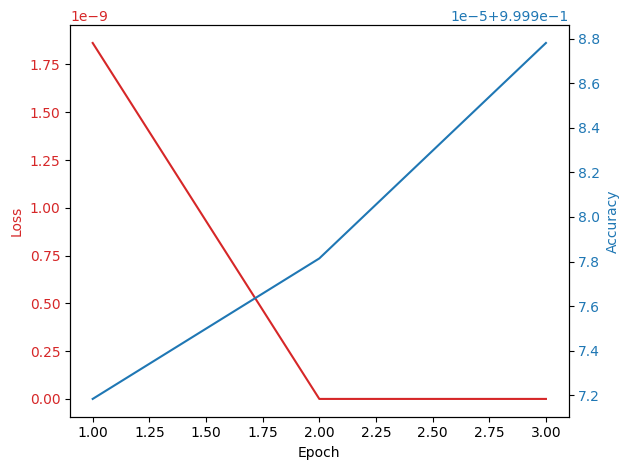

Training Complete
Model PyTorch disimpan


In [11]:
model_DNN = compile_train(modelDNN, X_train_normal, y_train, deep=True)
save_model_dl(model_DNN, optimizer, 'DNNModel1')

In [23]:
del train_df_clean, X_train_normal, y_train, model_DNN

In [10]:
loaded_model, loaded_optimizer = load_model_dl(modelDNN, optimizer, 'DNNModel1')

Model PyTorch dimuat


In [11]:
test_df_clean = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedftest_proc.csv', sep=',')

# Specify the data 
X_test = test_df_clean.iloc[:, 0:(test_df_clean.shape[1] - 1)]

# Specify the target labels and flatten the array
y_test = test_df_clean.iloc[:, -1]

In [9]:
X_test.describe()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,...,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06
mean,4.029222e+04,3.280226e+04,1.699503e+01,2.103523e+09,5.863102e+03,2.070357e+00,3.281285e-03,1.128023e+03,1.812153e+00,5.621176e+02,...,-1.017024e+08,4.128576e+01,1.227719e+01,5.796166e+01,3.431997e+01,3.758612e+03,5.891215e+01,3.809100e+03,3.712035e+03,9.994377e-01
std,1.897468e+04,1.892153e+04,2.387999e-01,1.186760e+09,4.275460e+05,2.455737e+01,7.942722e-01,4.592523e+02,1.115677e+03,2.180115e+02,...,3.126538e+08,3.597817e+04,1.568520e+04,4.703455e+04,3.500313e+04,3.077994e+05,3.843207e+04,3.145910e+05,3.044508e+05,2.370720e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,8.562922e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.356800e+04,1.645200e+04,1.700000e+01,1.096615e+09,1.000000e+00,2.000000e+00,0.000000e+00,8.700000e+02,0.000000e+00,4.350000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.225000e+04,3.281100e+04,1.700000e+01,1.991370e+09,1.000000e+00,2.000000e+00,0.000000e+00,9.660000e+02,0.000000e+00,4.820000e+02,...,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.059800e+04,4.918900e+04,1.700000e+01,3.161281e+09,1.000000e+00,2.000000e+00,0.000000e+00,1.184000e+03,0.000000e+00,5.920000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553200e+04,6.553500e+04,1.700000e+01,4.286280e+09,1.189268e+08,2.527400e+04,1.425000e+03,1.634240e+05,2.230868e+06,3.564000e+03,...,1.480000e+03,8.140801e+07,3.610598e+07,8.140801e+07,8.140801e+07,7.186648e+07,3.365300e+07,7.186648e+07,7.186648e+07,1.000000e+00


In [12]:
X_test_normal = normalize_data(X_data=X_test)

In [14]:
df_from_array = pd.DataFrame(X_test_normal, columns=X_test.columns)
df_from_array.describe()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,...,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06,5.775786e+06
mean,-6.849807e-18,8.862491e-17,2.905723e-15,6.944558e-16,4.542549e-19,7.731790e-18,1.880837e-18,-3.335283e-17,3.663353e-18,-2.196970e-17,...,8.960355e-17,7.766534e-18,-6.072122e-18,5.280233e-18,-2.208764e-18,1.532718e-17,1.585992e-17,6.644054e-18,-8.851050e-18,-1.038570e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.123473e+00,-1.733595e+00,-7.116850e+01,-1.765276e+00,-1.371338e-02,-4.358599e-02,-4.131185e-03,-2.456216e+00,-1.624264e-03,-2.578385e+00,...,-4.178857e+00,-1.147523e-03,-7.827249e-04,-1.232321e-03,-9.804831e-04,-1.221124e-02,-1.532891e-03,-1.210810e-02,-1.219256e-02,-4.215755e+01
25%,-8.813965e-01,-8.641090e-01,2.079743e-02,-8.484512e-01,-1.371104e-02,-2.865006e-03,-4.131185e-03,-5.618320e-01,-1.624264e-03,-5.830775e-01,...,3.252877e-01,-1.147523e-03,-7.827249e-04,-1.232321e-03,-9.804831e-04,-1.221124e-02,-1.532891e-03,-1.210810e-02,-1.219256e-02,2.372054e-02
50%,1.031788e-01,4.619500e-04,2.079743e-02,-9.450353e-02,-1.371104e-02,-2.865006e-03,-4.131185e-03,-3.527966e-01,-1.624264e-03,-3.674925e-01,...,3.252877e-01,-1.147523e-03,-7.827249e-04,-1.232321e-03,-9.804831e-04,-1.221124e-02,-1.532891e-03,-1.210810e-02,-1.219256e-02,2.372054e-02
75%,1.070152e+00,8.660370e-01,2.079743e-02,8.912991e-01,-1.371104e-02,-2.865006e-03,-4.131185e-03,1.218881e-01,-1.624264e-03,1.370680e-01,...,3.252878e-01,-1.147523e-03,-7.827249e-04,-1.232321e-03,-9.804831e-04,-1.221124e-02,-1.532891e-03,-1.210810e-02,-1.219256e-02,2.372054e-02
max,1.330182e+00,1.729921e+00,2.079743e-02,1.839257e+00,2.781478e+02,1.029098e+03,1.794091e+03,3.533918e+02,1.999564e+03,1.376938e+01,...,3.252924e-01,2.262705e+03,2.301913e+03,1.730812e+03,2.325735e+03,2.334726e+02,8.756474e+02,2.284321e+02,2.360407e+02,2.372054e-02


In [13]:
test_dataset = TensorDataset(torch.FloatTensor(X_test_normal), torch.FloatTensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# Testing Model

In [14]:
cm1, accmodel1, precmodel1, recmodel1, f1model1, roc_aucmodel1, prc_aucmodel1, avrgmodel1 = testes(loaded_model, test_loader)


Confusion Matrix:
[[    575    2219]
 [      9 5772983]]

Akurasi
0.9996142516360543

Presisi
0.9996157710154554

Recall
0.9999984410163741

Skor F1
0.9998070693997693

Area Under the ROC Curve (AU-ROC)
0.6028982899426896

Area Under the Precision-Recall Curve (AU-PRC)
0.9998078851306534

Rata-rata (akurasi, presisi, recall, F1, AU-ROC, AU-PRC)
0.9336236180234995


In [15]:
del X_test

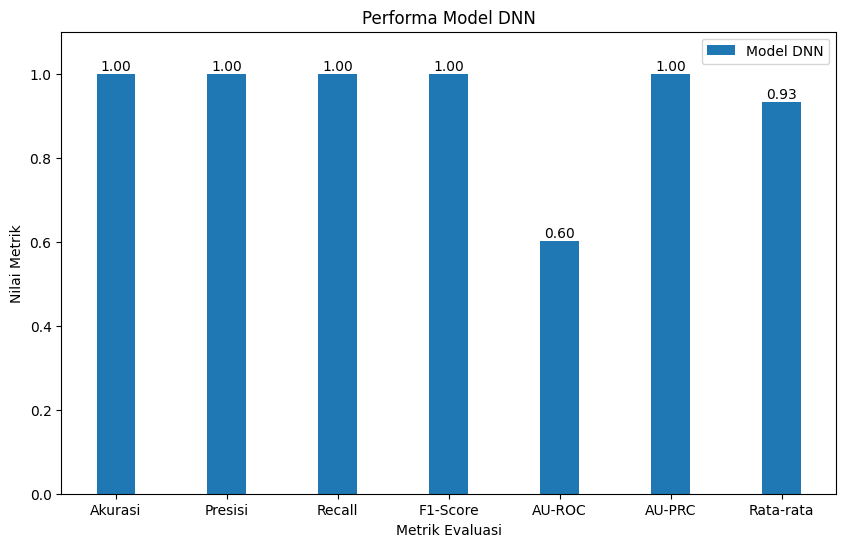

In [19]:
import matplotlib.pyplot as plt

# Metrik yang akan diplot untuk Model DNN
metrik_labels = ['Akurasi', 'Presisi', 'Recall', 'F1-Score', 'AU-ROC', 'AU-PRC', 'Rata-rata']
metrik_model1 = [accmodel1, precmodel1, recmodel1, f1model1, roc_aucmodel1, prc_aucmodel1, avrgmodel1]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(metrik_labels))

bar1 = ax.bar(index, metrik_model1, bar_width, label='Model DNN')

# Menambahkan label dan judul
ax.set_xlabel('Metrik Evaluasi')
ax.set_ylabel('Nilai Metrik')
ax.set_title('Performa Model DNN')
ax.set_xticks([i for i in index])
ax.set_xticklabels(metrik_labels)
ax.legend()
plt.ylim(0, 1.1)  # Sesuaikan batas atas sumbu y sesuai kebutuhan

# Menambahkan nilai metrik pada batang dengan pembulatan
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bar1)

# Menampilkan plot
plt.show()

# Improve model with SMOTE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import torch

# Baca Data Masukkan

In [2]:
def load_normalflows(path):
    data = pd.read_csv(path, sep=',')
    
    is_benign = data[' Label']=='BENIGN'
    flows_ok = data[is_benign]
    
    return flows_ok

def load_huge_file(path):
    df_chunk = pd.read_csv(path, chunksize=500000)
    
    chunk_list_ok = []  # append each chunk df here 

    # Each chunk is in df format
    for chunk in df_chunk:  
        # perform data filtering 
        is_benign = chunk[' Label']=='BENIGN'
        flows_ok = chunk[is_benign]
        
        # Once the data filtering is done, append the chunk to list
        chunk_list_ok.append(flows_ok)
        
    # concat the list into dataframe 
    flows_ok = pd.concat(chunk_list_ok)
    
    return flows_ok


In [3]:
normal_flows = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_NTP.csv')
print('normal flows from file DrDoS_NTP.csv loaded')

normal_flows2 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_DNS.csv')
normal_flows = pd.concat([normal_flows, normal_flows2], ignore_index=True)
print('normal flows from file DrDoS_DNS.csv loaded')
del normal_flows2

normal_flows3 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_LDAP.csv')
normal_flows = pd.concat([normal_flows, normal_flows3], ignore_index=True)
print('normal flows from file DrDoS_LDAP.csv loaded')
del normal_flows3

normal_flows4 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_NetBIOS.csv')
normal_flows = pd.concat([normal_flows, normal_flows4], ignore_index=True)
print('normal flows from file DrDoS_NetBIOS.csv loaded')
del normal_flows4

normal_flows5 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_SNMP.csv')
normal_flows = pd.concat([normal_flows, normal_flows5], ignore_index=True)
print('normal flows from file DrDoS_SNMP.csv loaded')
del normal_flows5

normal_flows6 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/DrDoS_UDP.csv')
normal_flows = pd.concat([normal_flows, normal_flows6], ignore_index=True)
print('normal flows from file DrDoS_UDP.csv loaded')
del normal_flows6

normal_flows7 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/UDPLag.csv')
normal_flows = pd.concat([normal_flows, normal_flows7], ignore_index=True)
print('normal flows from file UDPLag.csv loaded')
del normal_flows7

normal_flows8 = load_normalflows('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/Syn.csv')
normal_flows = pd.concat([normal_flows, normal_flows8], ignore_index=True)
print('normal flows from file Syn.csv loaded')
del normal_flows8

normal_flows9 = load_huge_file('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/TFTP.csv')
normal_flows = pd.concat([normal_flows, normal_flows9], ignore_index=True)
print('normal flows from file TFTP.csv loaded')
del normal_flows9

C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_NTP.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_DNS.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_LDAP.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_NetBIOS.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_SNMP.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file DrDoS_UDP.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file UDPLag.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


normal flows from file Syn.csv loaded


C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\4019076331.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\BARA\AppData\Local\Temp\ip

normal flows from file TFTP.csv loaded


# Inisialisasi dataset pelatihan

In [4]:
train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')
train_dfnew = pd.concat([train_df, normal_flows], ignore_index=True)

train_dfnew.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_dataframe_new.csv', index = None, header=True)

del train_df, train_dfnew

C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\3647906205.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/merge_dataframe.csv', sep=',')


In [5]:
train_dfnew = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_dataframe_new.csv', sep=',')

C:\Users\BARA\AppData\Local\Temp\ipykernel_32052\3718782579.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dfnew = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_dataframe_new.csv', sep=',')


In [6]:
# Hitung jumlah sampel untuk setiap kelas
jumlah_attack1 = len(train_dfnew[train_dfnew[' Label'] == 'DrDoS_MSSQL'])
jumlah_attack2 = len(train_dfnew[train_dfnew[' Label'] == 'DrDoS_SSDP'])
jumlah_normal = len(train_dfnew[train_dfnew[' Label'] == 'BENIGN'])

print(f'Jumlah sampel Attack pada training dataset new: {jumlah_attack1 + jumlah_attack2}')
print(f'Jumlah sampel Normal pada training dataset new: {jumlah_normal}')

Jumlah sampel Attack pada training dataset new: 7133103
Jumlah sampel Normal pada training dataset new: 56863


In [8]:
train_dfnew = train_dfnew.replace('Infinity','0')
train_dfnew = train_dfnew.replace('nan','0')
train_dfnew = train_dfnew.fillna(0)
train_dfnew = train_dfnew.replace(np.inf,0)

#Label
train_dfnew[' Label'] = train_dfnew[' Label'].replace('BENIGN',0)
train_dfnew[' Label'] = train_dfnew[' Label'].replace('DrDoS_MSSQL',1)
train_dfnew[' Label'] = train_dfnew[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
# Mengonversi kolom 'Timestamp' menjadi format datetime
train_dfnew[' Timestamp'] = pd.to_datetime(train_dfnew[' Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
train_dfnew['Hour'] = train_dfnew[' Timestamp'].dt.hour
train_dfnew['Minute'] = train_dfnew[' Timestamp'].dt.minute
train_dfnew['Second'] = train_dfnew[' Timestamp'].dt.second
train_dfnew['Time'] = train_dfnew['Hour'].astype(str) + ':' + train_dfnew['Minute'].astype(str) + ':' + train_dfnew['Second'].astype(str)

import hashlib

def string2numeric_hash(text):
    text_encoded = text.encode('utf-8')
    return int(hashlib.md5(text_encoded).hexdigest()[:8], 16)

train_dfnew[' Timestamp'] = train_dfnew['Time'].apply(string2numeric_hash)
train_dfnew = train_dfnew.drop(['Time', 'Hour', 'Minute', 'Second'], axis=1)

# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del train_dfnew[' Source IP']
del train_dfnew[' Destination IP']
del train_dfnew['Flow ID']
del train_dfnew['SimillarHTTP']
del train_dfnew['Unnamed: 0']

train_dfnew.to_csv(r'D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedf_proc_new.csv', index = None, header=True) 
print('Labeling data processed')

Labeling data processed


In [3]:
train_dfnew = pd.read_csv('D:/Semester7/dataset/CIC-2019/CSV-01-12/01-12/export_mergedf_proc_new.csv', sep=',')

# Specify the data 
X_trainnew = train_dfnew.iloc[:, 0:(train_dfnew.shape[1] - 1)]

# Specify the target labels and flatten the array
y_trainnew = train_dfnew.iloc[:, -1]

In [6]:
X_trainnew = normalize_data(X_trainnew)

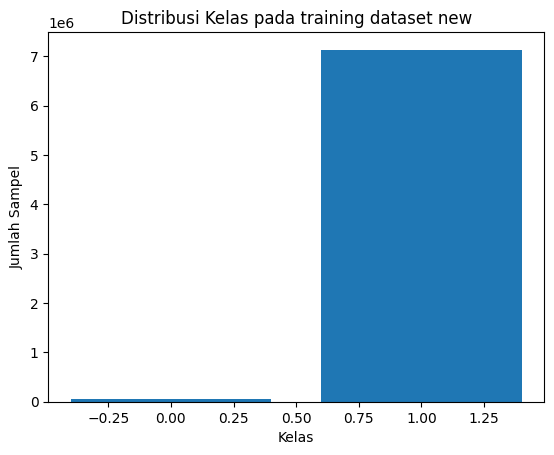

In [7]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels, counts = np.unique(y_trainnew, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas pada training dataset new')
plt.show()

In [10]:
unique_labels, counts = np.unique(y_trainnew, return_counts=True)
print(counts)

[  56863 7133103]


In [8]:
from imblearn.under_sampling import RandomUnderSampler

# Inisialisasi objek RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)

# Terapkan undersampling pada dataset
X_resampled, y_resampled = undersampler.fit_resample(X_trainnew, y_trainnew)

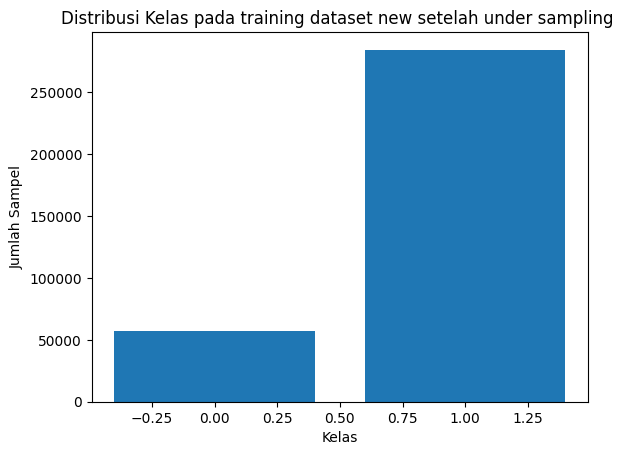

In [9]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels, counts = np.unique(y_resampled, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas pada training dataset new setelah under sampling ')
plt.show()

In [13]:
unique_labels, counts = np.unique(y_resampled, return_counts=True)
print(counts)

[ 56863 284315]


In [14]:
del X_trainnew, y_trainnew

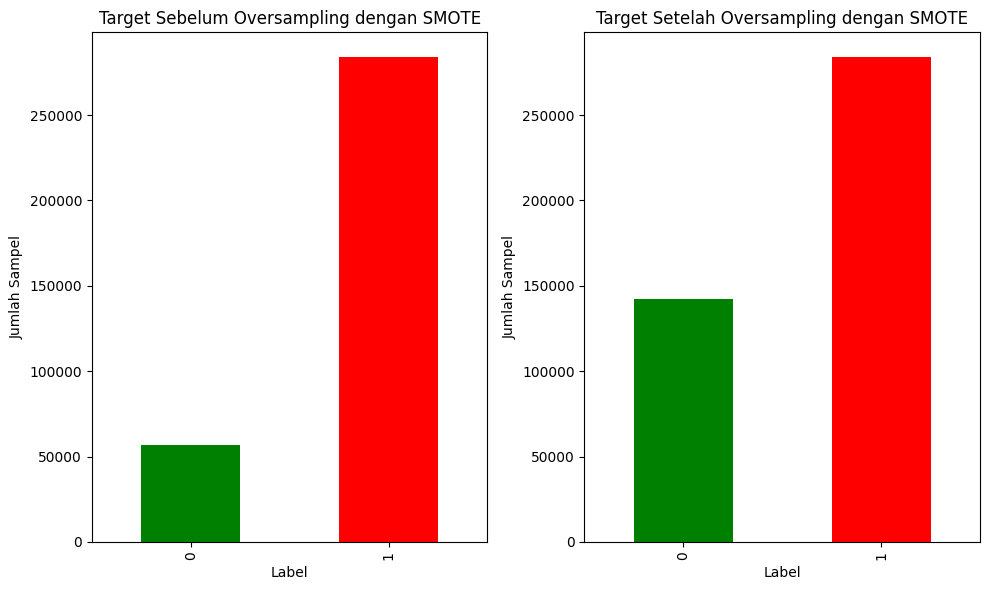

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk melakukan oversampling pada kelas minoritas (normal)
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_smote, y_train_smote = smote.fit_resample(X_resampled, y_resampled)

input_size = (X_train_smote.shape[1])

# Visualisasi sebelum dan sesudah oversampling dengan SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y_resampled.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title("Target Sebelum Oversampling dengan SMOTE")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

plt.subplot(1, 2, 2)
y_train_smote.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title("Target Setelah Oversampling dengan SMOTE")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

plt.tight_layout()
plt.show()

In [16]:
unique_labels, counts = np.unique(y_train_smote, return_counts=True)
print(counts)

[142157 284315]


In [17]:
import torch.nn as nn

class DNNModel2(nn.Module):
    def __init__(self, input_size):
        super(DNNModel2, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(input_size*2, input_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(input_size, input_size//2)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(input_size//2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [18]:
modelDNN_SMOTE = DNNModel2(82)
optimizer = optim.Adam(modelDNN_SMOTE.parameters(), lr=0.001)

Epoch [1/3], Loss: 0.006817962042987347, Accuracy: 0.9996764148642818
Epoch [2/3], Loss: 3.2908443245105445e-05, Accuracy: 0.9998897934682699
Epoch [3/3], Loss: 3.6592686228686944e-05, Accuracy: 0.9998991727475661


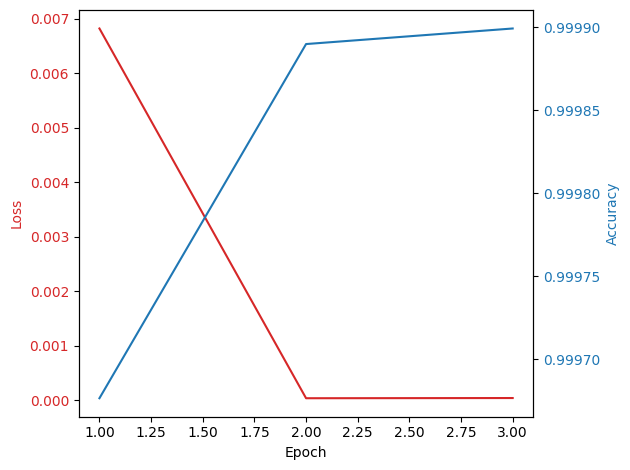

Training Complete
Model PyTorch disimpan


In [19]:
model_DNN_SMOTE = compile_train(modelDNN_SMOTE, X_train_smote, y_train_smote, deep=True)
save_model_dl(model_DNN_SMOTE, optimizer, 'DNNModel_SMOTE')

In [19]:
loaded_model2, loaded_optimizer2 = load_model_dl(modelDNN_SMOTE, optimizer, 'DNNModel_SMOTE')

Model PyTorch dimuat


In [20]:
cm2, accmodel2, precmodel2, recmodel2, f1model2, roc_aucmodel2, prc_aucmodel2, avrgmodel2 = testes(loaded_model2, test_loader)


Confusion Matrix:
[[   2775      19]
 [    263 5772729]]

Akurasi
0.9999511754763767

Presisi
0.999996708673235

Recall
0.9999544430340455

Skor F1
0.9999755754070333

Area Under the ROC Curve (AU-ROC)
0.9965770783531

Area Under the Precision-Recall Curve (AU-PRC)
0.9999983433176703

Rata-rata (akurasi, presisi, recall, F1, AU-ROC, AU-PRC)
0.99940888737691


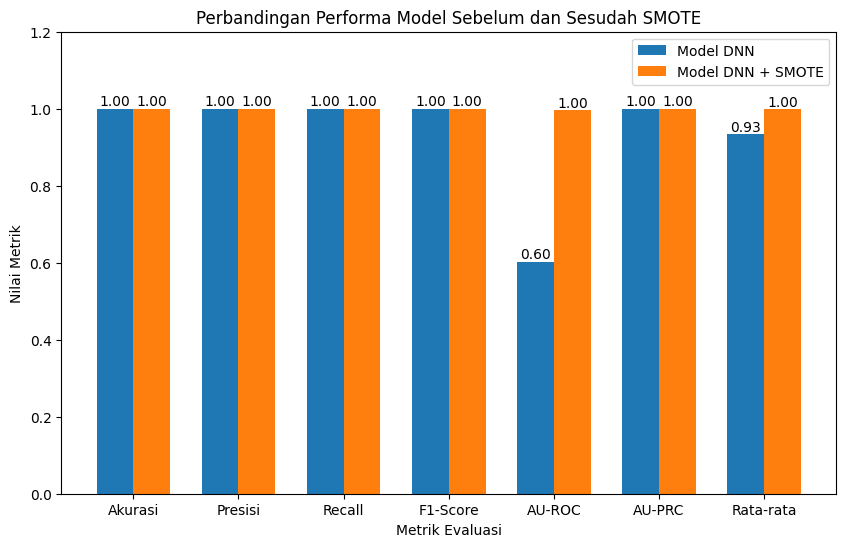

In [32]:
import matplotlib.pyplot as plt

# Metrik yang akan diplot
metrik_labels = ['Akurasi', 'Presisi', 'Recall', 'F1-Score', 'AU-ROC', 'AU-PRC', 'Rata-rata']
metrik_model1 = [accmodel1, precmodel1, recmodel1, f1model1, roc_aucmodel1, prc_aucmodel1, avrgmodel1]
metrik_model2 = [accmodel2, precmodel2, recmodel2, f1model2, roc_aucmodel2, prc_aucmodel2, avrgmodel2]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(metrik_labels))

bar1 = ax.bar(index, metrik_model1, bar_width, label='Model DNN')
bar2 = ax.bar([i + bar_width for i in index], metrik_model2, bar_width, label='Model DNN + SMOTE')

# Menambahkan label dan judul
ax.set_xlabel('Metrik Evaluasi')
ax.set_ylabel('Nilai Metrik')
ax.set_title('Perbandingan Performa Model Sebelum dan Sesudah SMOTE')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrik_labels)
ax.legend()
plt.ylim(0, 1.2)  # Sesuaikan batas atas sumbu y sesuai kebutuhan

# Menambahkan nilai metrik pada batang dengan pembulatan
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)


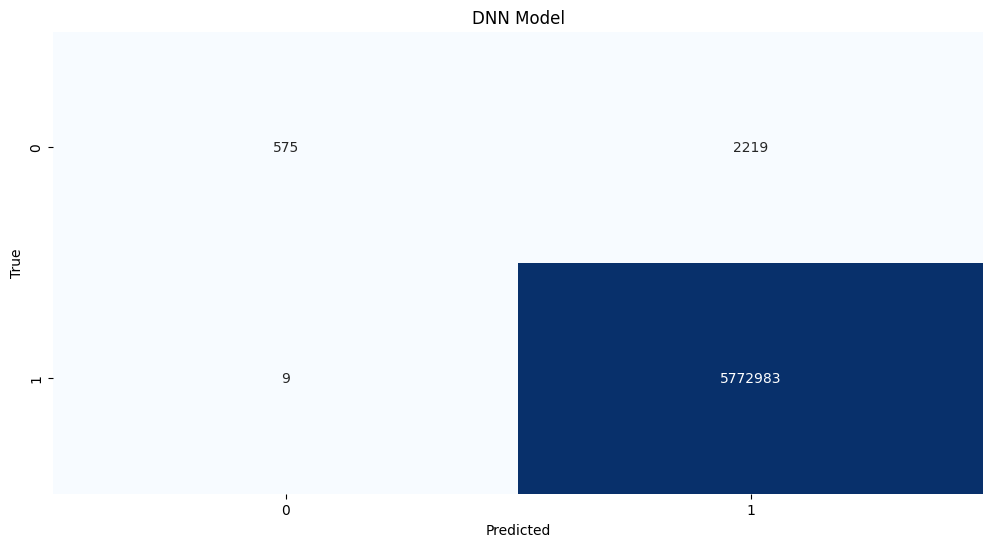

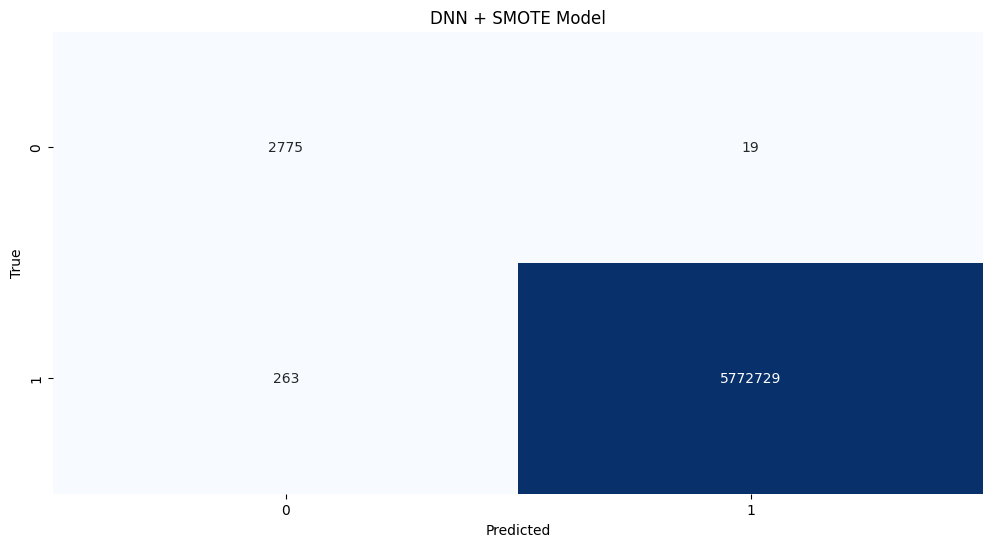

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menggambar confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Visualisasi Confusion Matrix untuk Model 1
plot_confusion_matrix(cm1, 'DNN Model')

# Visualisasi Confusion Matrix untuk Model 2
plot_confusion_matrix(cm2, 'DNN + SMOTE Model')


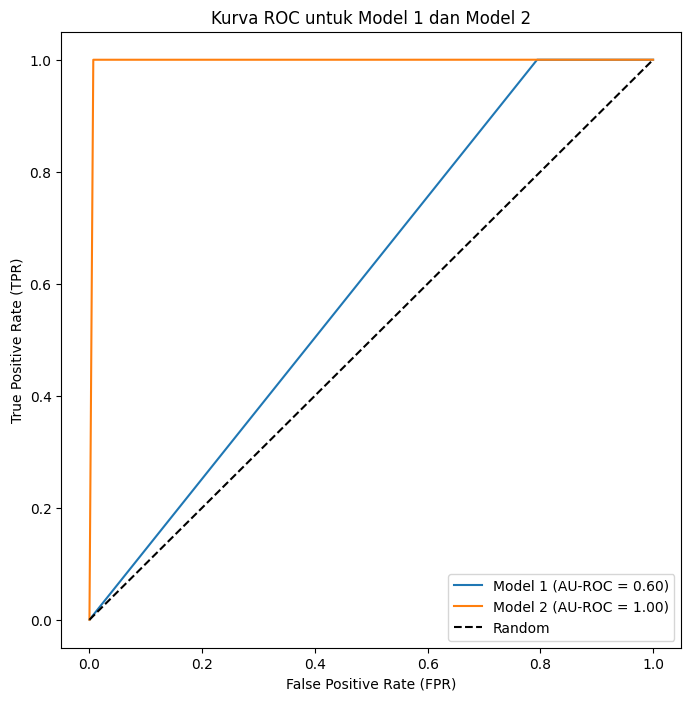

In [28]:
from sklearn.metrics import roc_curve
def test_model(model, data_loader):
    all_y_test = []
    all_y_pred = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            if isinstance(model, torch.nn.Module):
                # For deep learning models
                model.eval()
                y_pred_tensor = model(inputs)
                y_pred_binary = torch.round(torch.sigmoid(y_pred_tensor))
                all_y_pred.extend(y_pred_binary.numpy())
            else:
                # For non-deep learning models
                y_pred = model.predict(inputs)
                all_y_pred.extend(y_pred)

            # Collect all labels
            all_y_test.extend(labels.numpy())

    return np.array(all_y_test), np.array(all_y_pred)

# Pengujian untuk Model 1
y_test_model1, y_pred_model1 = test_model(loaded_model, test_loader)
roc_auc_model1 = roc_auc_score(y_test_model1, y_pred_model1)

# Pengujian untuk Model 2
y_test_model2, y_pred_model2 = test_model(loaded_model2, test_loader)
roc_auc_model2 = roc_auc_score(y_test_model2, y_pred_model2)

# Menghitung false positive rate (FPR), true positive rate (TPR), dan threshold
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_test_model1, y_pred_model1)
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_test_model2, y_pred_model2)

# Plot kurva ROC untuk kedua model
plt.figure(figsize=(8, 8))
plt.plot(fpr_model1, tpr_model1, label='Model DNN (AU-ROC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Model DNN + SMOTE(AU-ROC = {:.2f})'.format(roc_auc_model2))

# Plot garis referensi acak
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Menambahkan label dan judul
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC untuk Model DNN dan Model DNN + SMOTE')
plt.legend()

# Menampilkan plot
plt.show()


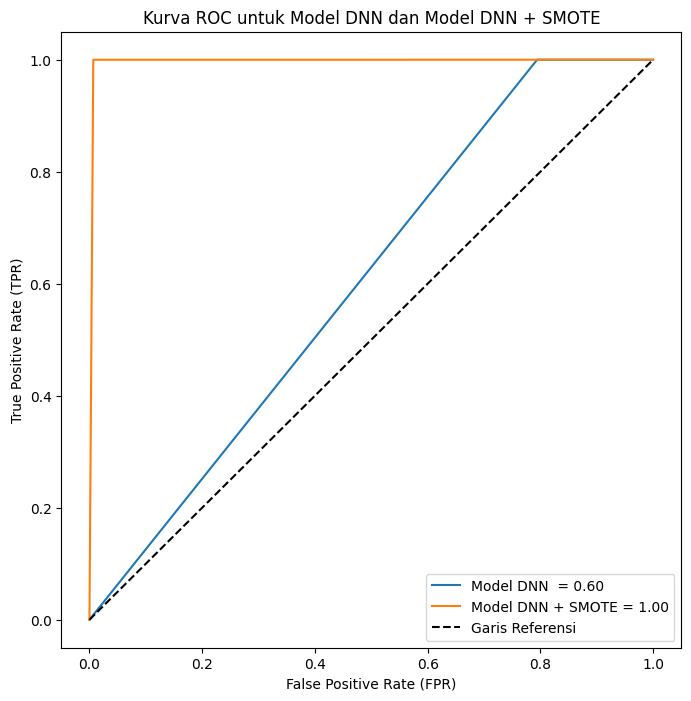

In [34]:
# Menghitung false positive rate (FPR), true positive rate (TPR), dan threshold
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_test_model1, y_pred_model1)
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_test_model2, y_pred_model2)

# Plot kurva ROC untuk kedua model
plt.figure(figsize=(8, 8))
plt.plot(fpr_model1, tpr_model1, label='Model DNN  = {:.2f}'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Model DNN + SMOTE = {:.2f}'.format(roc_auc_model2))

# Plot garis referensi acak
plt.plot([0, 1], [0, 1], 'k--', label='Garis Referensi')

# Menambahkan label dan judul
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC untuk Model DNN dan Model DNN + SMOTE')
plt.legend()

# Menampilkan plot
plt.show()